In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style(style="darkgrid")
%matplotlib inline

In [3]:
pip install -U seaborn

  Using cached https://files.pythonhosted.org/packages/10/5b/0479d7d845b5ba410ca702ffcd7f2cd95a14a4dfff1fde2637802b258b9b/seaborn-0.11.2-py3-none-any.whl
  Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\seaborn-0.9.0.dist-info\\INSTALLER'
Consider using the `--user` option or check the permissions.



# Loading data

In [4]:
df=pd.read_csv('basketball_hof.csv')

In [5]:
df

,year,hofID,name,category
0,1959,NaN,Amos Alonzo Stagg,Contributor
1,1959,NaN,Charles Hyatt,Player
2,1959,NaN,Edward Hickox,Contributor
3,1959,mikange01,George Mikan,Player
4,1959,NaN,Hank Luisetti,Player
...,...,...,...,...
323,2012,NaN,Lidia Alexeeva,Coach
324,2012,danieme01,Mel Daniels,Player
325,2012,NaN,Phil Knight,Contributor
326,2012,sampsra01,Ralph Sampson,Player


# Feature Engineering 

In [6]:
df.head(10)

,year,hofID,name,category
0,1959,NaN,Amos Alonzo Stagg,Contributor
1,1959,NaN,Charles Hyatt,Player
2,1959,NaN,Edward Hickox,Contributor
3,1959,mikange01,George Mikan,Player
4,1959,NaN,Hank Luisetti,Player
5,1959,olsenha01,Harold Olsen,Contributor
6,1959,NaN,Henry Clifford Carlson,Coach
7,1959,NaN,James Naismith,Contributor
8,1959,NaN,John Schommer,Player
9,1959,NaN,Luther Gulick,Contributor


In [7]:
df.dtypes

year         int64
hofID       object
name        object
category    object
dtype: object

In [8]:
df.describe()

,year
count,328.000000
mean,1986.161585
std,17.113261
min,1959.000000
25%,1972.000000
50%,1987.000000
75%,2001.000000
max,2012.000000


In [9]:
print(df.isnull().sum())

year          0
hofID       188
name          0
category      0
dtype: int64


In [10]:
df.mean()

year    1986.161585
dtype: float64

In [11]:
df.dropna()

,year,hofID,name,category
3,1959,mikange01,George Mikan,Player
5,1959,olsenha01,Harold Olsen,Contributor
19,1960,macaued01,Ed Macauley,Player
24,1960,woodejo01,John Wooden,Player
27,1961,phillan01,Andy Phillip,Player
...,...,...,...,...
319,2012,nelsodo01,Don Nelson,Coach
321,2012,wilkeja01,Jamaal Wilkes,Player
324,2012,danieme01,Mel Daniels,Player
326,2012,sampsra01,Ralph Sampson,Player


In [12]:
df.fillna(1)

,year,hofID,name,category
0,1959,1,Amos Alonzo Stagg,Contributor
1,1959,1,Charles Hyatt,Player
2,1959,1,Edward Hickox,Contributor
3,1959,mikange01,George Mikan,Player
4,1959,1,Hank Luisetti,Player
...,...,...,...,...
323,2012,1,Lidia Alexeeva,Coach
324,2012,danieme01,Mel Daniels,Player
325,2012,1,Phil Knight,Contributor
326,2012,sampsra01,Ralph Sampson,Player


In [13]:
df.columns

Index(['year', 'hofID', 'name', 'category'], dtype='object')

# Visualisation and Analysis

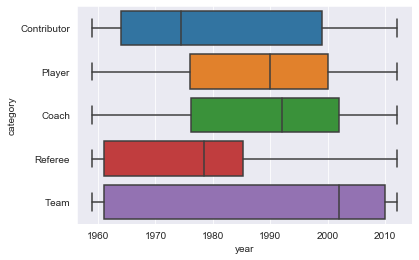

In [14]:
sns.boxplot(x='year',y='category',data=df)

In [15]:
df['year'].value_counts()

1959    17
1961    17
2012    12
2011    10
1960    10
2010    10
1992     9
1993     8
1964     7
1979     7
1995     7
1997     7
1998     7
1985     7
2008     7
2003     7
1982     7
2007     7
1991     7
1972     6
1973     6
1983     6
1986     6
1996     6
1962     6
2000     6
2002     6
2004     6
2006     6
1980     6
1969     5
1977     5
1978     5
2009     5
1984     5
1987     5
2005     5
1999     5
1994     5
1965     4
1968     4
1981     4
1988     4
1975     4
1976     4
1990     4
1971     3
1989     3
1974     3
1963     3
2001     3
1970     2
1966     2
Name: year, dtype: int64

In [16]:
df['year'].value_counts().to_frame()

,year
1959,17
1961,17
2012,12
2011,10
1960,10
2010,10
1992,9
1993,8
1964,7
1979,7


In [17]:
df.corr()['year'].sort_values()

year    1.0
Name: year, dtype: float64

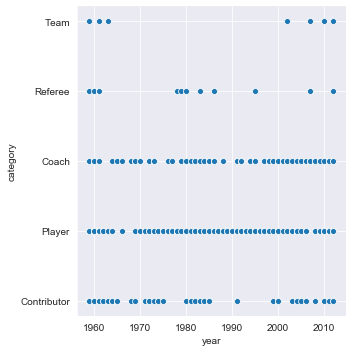

In [18]:
sns.relplot(x='year',y='category',sizes=(15,200),data=df)

In [19]:
df = pd.DataFrame(dict(year=np.arange(100),
                       category=np.random.randn(100).cumsum()))
df

,year,category
0,0,0.992688
1,1,1.024845
2,2,2.233542
3,3,1.467937
4,4,2.321957
...,...,...
95,95,17.717080
96,96,18.787150
97,97,18.548033
98,98,19.750742


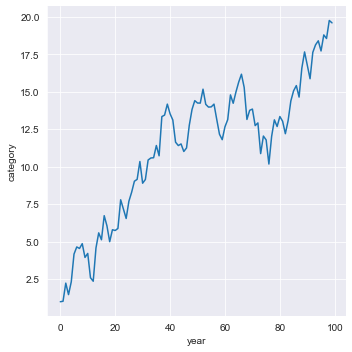

In [20]:
ba = sns.relplot(x="year", y="category", kind="line", data=df)
ba

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
year        100 non-null int32
category    100 non-null float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


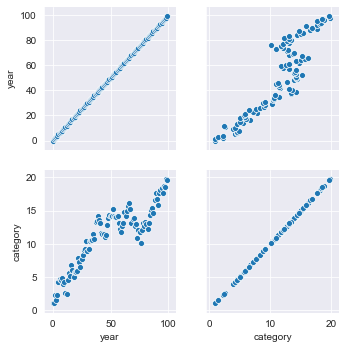

In [28]:

ba= sns.PairGrid(df)
ba.map(sns.scatterplot)

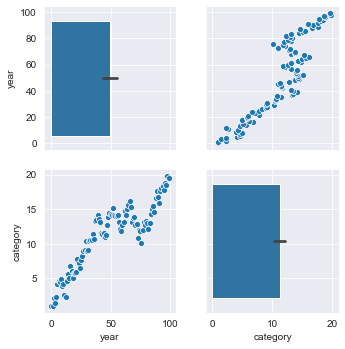

In [31]:
ba = sns.PairGrid(df)
ba.map_diag(sns.barplot)
ba.map_offdiag(sns.scatterplot)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [36]:
X = df[['year']]
Y = df['category']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.8102269050751404

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

In [38]:
x_train, x_test, y_train, y_test

(    year
 32    32
 31    31
 44    44
 78    78
 10    10
 ..   ...
 75    75
 9      9
 72    72
 12    12
 37    37
 
 [85 rows x 1 columns],     year
 80    80
 84    84
 33    33
 81    81
 93    93
 17    17
 36    36
 82    82
 69    69
 65    65
 92    92
 39    39
 56    56
 52    52
 51    51, 32    10.444743
 31     9.144372
 44    11.516450
 78    13.123265
 10     4.214643
         ...    
 75    11.786479
 9      3.947485
 72    12.917521
 12     2.359635
 37    13.338880
 Name: category, Length: 85, dtype: float64, 80    13.344084
 84    14.383345
 33    10.579499
 81    13.029008
 93    18.125916
 17     6.053891
 36    10.724993
 82    12.197902
 69    13.758712
 65    15.639385
 92    17.623563
 39    14.170599
 56    14.171168
 52    15.168279
 51    14.239982
 Name: category, dtype: float64)